In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("selling.csv")

In [52]:
data.head(4)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845


In [53]:
data.rename(columns={"Temperature (°C)":"temperature","Ice Cream Sales (units)":"sales"},inplace =True)

In [54]:
data.head(4)

,temperature,sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845


Text(0, 0.5, 'sales')

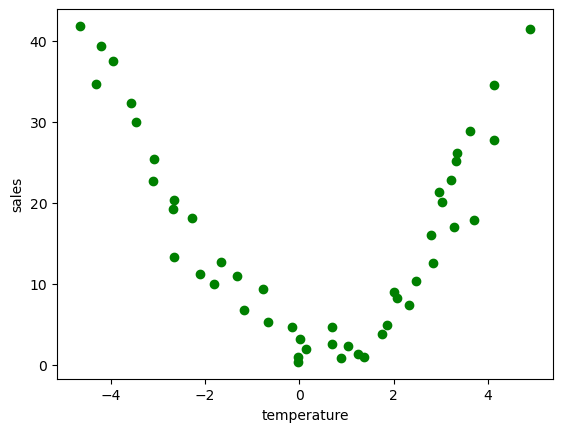

In [55]:
x=data[["temperature"]]
y=data["sales"]
plt.scatter(x,y,color='g')
plt.xlabel("temperature")
plt.ylabel("sales")

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [58]:
ypred=model.predict(xtest)

In [59]:
from sklearn.metrics import r2_score
score=r2_score(ytest,ypred)

In [60]:
score

-0.0734596067983353

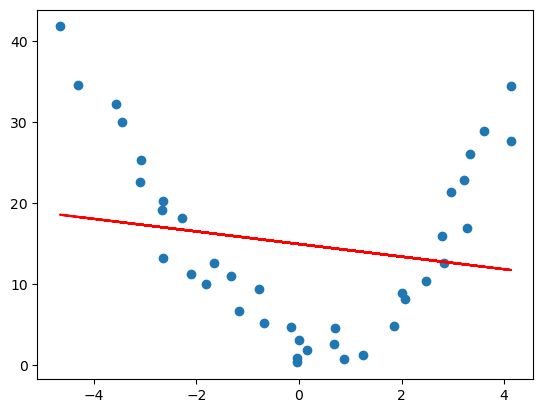

In [61]:
plt.plot(xtrain,model.predict(xtrain),color='r')
plt.scatter(xtrain,ytrain)

In [62]:
#polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
model=PolynomialFeatures(degree=2,include_bias=True) # 1 will also get created
xtrain_poly=model.fit_transform(xtrain)
xtest_poly=model.transform(xtest)

In [63]:
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(xtrain_poly,ytrain)
ypred=model.predict(xtest_poly)
score=r2_score(ytest,ypred)

In [64]:
score

0.928943996651409

In [65]:
model.coef_

array([ 0.        , -0.65725822,  1.80939278])

In [66]:
model.intercept_

3.3407930707775826

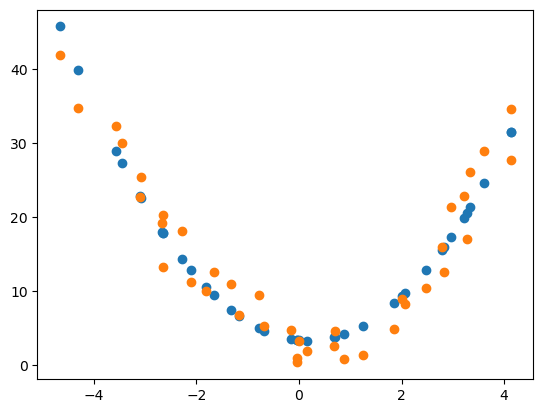

In [69]:
plt.scatter(xtrain,model.predict(xtrain_poly))
plt.scatter(xtrain,ytrain)